In [1]:
import numpy as np
import scipy as sy
from scipy.optimize import root
from matplotlib import pyplot as plt

Problem 1

In [2]:
def equations1(v, g):
    '''
    Function which defines and output a list of functions defining the solution to the model
    Inputs: 
        v: vector of inputs to the function
    Output:
        rv: list of functions
    '''
    a_1_1, a_2_1, a_1_2, a_2_2, r_1, r_2 = v
    rv = []
    f_a_1_1 = (-r_1*(1- (r_1 * a_1_1) + (r_2 * a_2_1))** -g + 
            .25 * ( (1+a_1_1+a_2_1)**-g + (2+a_1_1+a_2_1)**-g + 
            (1+a_1_1+1.5*a_2_1)**-g  + (2+a_1_1+1.5*a_2_1)**-g ) ) 
    rv.append(f_a_1_1)
    
    f_a_2_1 = (-r_2*(1- (r_1 * a_1_1) + (r_2 * a_2_1))**-g + 
            .25 * ( (1+a_1_1+a_2_1)**-g + (2+a_1_1+a_2_1)**-g + 
            1.5*(1+a_1_1+1.5*a_2_1)**-g  + 1.5*(2+a_1_1+1.5*a_2_1)**-g ) )
    rv.append(f_a_2_1)
    
    f_a_1_2 = (-r_1*(1- (r_1 * a_1_2) + (r_2 * a_2_2))** -g + 
            .25 * ( (3+a_1_2+a_2_2)**-g + (1+a_1_2+a_2_2)**-g + 
            (3+a_1_2+1.5*a_2_2)**-g  + (1+a_1_2+1.5*a_2_2)**-g ) )
    rv.append(f_a_1_2)
    
    f_a_2_2 = (-r_2*(1- (r_1 * a_1_2) + (r_2 * a_2_2))** -g + 
            .25 * ( (3+a_1_2+a_2_2)**-g + (1+a_1_2+a_2_2)**-g + 
            1.5*(3+a_1_2+1.5*a_2_2)**-g  + 1.5*(1+a_1_2+1.5*a_2_2)**-g ) ) 
    rv.append(f_a_2_2)
    rv.append(a_1_1 + a_1_2)
    rv.append(a_2_1 + a_2_2)
    return rv 

def solver1(g):
    rv =  root(equations1, [.5, .5, .5, .5, .5, .5], method = 'hybr', args=(g)).x
    return rv

class Solution1:
    def __init__(self, arr):
        self.A11 = arr[0]
        self.A21 = arr[1]
        self.A12 = arr[2]
        self.A22 = arr[3]
        self.R1 = arr[4]
        self.R2 = arr[5]
     
    def __str__(self):
        rv = []
        rv.append('{:<20}{}'.format('H1, Asset 1:', self.A11))
        rv.append('{:<20}{}'.format('H1, Asset 2:', self.A21))
        rv.append('{:<20}{}'.format('H2, Asset 1:', self.A12))
        rv.append('{:<20}{}'.format('H2, Asset 2:', self.A22))
        rv.append('{:<20}{}'.format('Asset 1, Price:', self.R1))
        rv.append('{:<20}{}'.format('Asset 2, Price:', self.R2))
        return '\n'.join(rv)
    

for g in [2, 4, 8, 166]:
    print("Gamma: {}".format(g))
    tmp = Solution1(solver1(g))
    print(tmp)
    if g < 100:
        print('\n \n')
    

Gamma: 2
H1, Asset 1:        0.019540665546350387
H1, Asset 2:        -5.997142761502882e-12
H2, Asset 1:        -0.019540665546350387
H2, Asset 2:        5.997142751453827e-12
Asset 1, Price:     0.5897776558197745
Asset 2, Price:     0.7372220697751221

 

Gamma: 4
H1, Asset 1:        0.004029823681645771
H1, Asset 2:        -4.520386315367643e-11
H2, Asset 1:        -0.00402982368164577
H2, Asset 2:        4.5203863368132257e-11
Asset 1, Price:     0.5186613028541645
Asset 2, Price:     0.6483266285778475

 

Gamma: 8
H1, Asset 1:        0.0001560941529999874
H1, Asset 2:        4.338013916463119e-13
H2, Asset 1:        -0.0001560941529999874
H2, Asset 2:        -4.3380139189834673e-13
Asset 1, Price:     0.5010144010354313
Asset 2, Price:     0.626268001293289

 

Gamma: 166
H1, Asset 1:        6.502492716803548
H1, Asset 2:        4.074527337326263
H2, Asset 1:        -6.502492716803548
H2, Asset 2:        -4.074527337326263
Asset 1, Price:     -2.524271258962357e-24
Asset 2, Pric

Problem 3

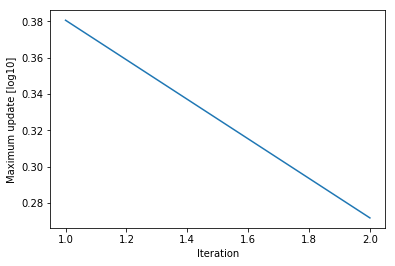

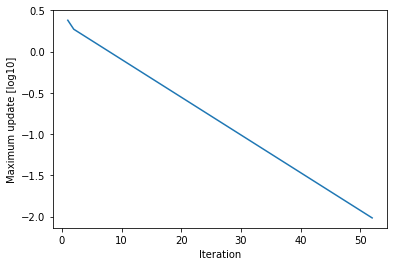

Converged after iteration 96


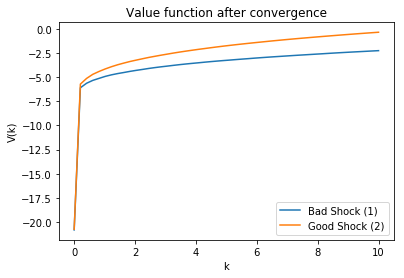

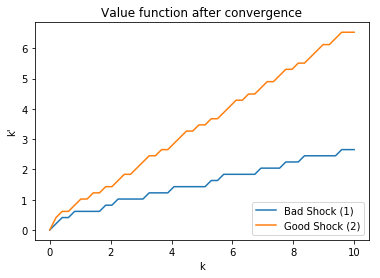

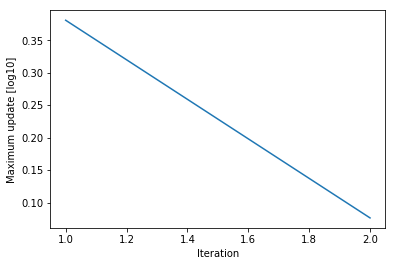

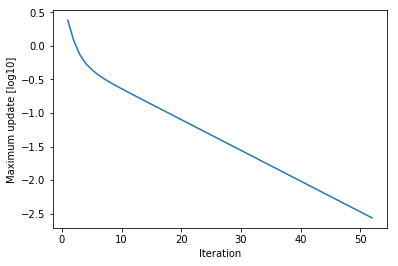

Converged after iteration 84


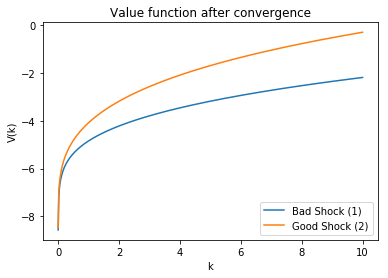

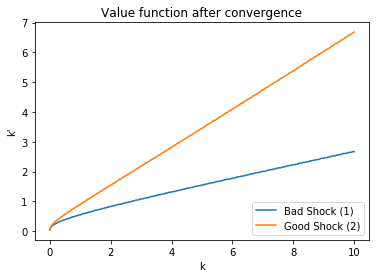

In [3]:
# Init Params
beta = .9 
pi = .5 
s_grid = [1, 2]
eps = .0001
max_iterations = 500

def objective_3(k, k1, V, state):
    '''
    Objective Function Value
    Given a specific k_index which will refer to a 
    '''
    val = np.zeros_like(k1)
    if state == 1:
        c = (((.9 * k) ** 0.3) + (.3*k) - k1)
    else:
        c = (((1.1 * k) ** 0.3) + (.9*k) - k1)
    val[c <= 0] = -999999
    val[c > 0] = np.log(c[c > 0]) + beta * V[c > 0] 
    return val

def ramsey_3(grid_size):
    k_grid = np.linspace(.001, 10, grid_size)     # Array of Admissable capital levels 
    ## Upper Case V denotes the average of the two states, lower case v denotes state specific value
    V = np.zeros_like(k_grid)                     # (1, grid_size) dim vector of the value functions 
    v = np.zeros([len(k_grid), len(s_grid)])      # (2, grid_size) array of the value functions by state
    diff_list = []                                # diff_list
    pol = np.zeros_like(v)                        # (2, grid_size) array of policy functions by state 
    plot_int = 50                                 # Plotting Frequency
    
    for itera in range(max_iterations):
        V_new = np.zeros_like(V)
        v_new = np.zeros_like(v)
        for i, k in enumerate(k_grid):
            for j, s in enumerate(s_grid):
                val = objective_3(k, k_grid, V, s)
                v_new[i, j] = np.amax(val)
                pol[i, j] = k_grid[np.argmax(val)]
            V_new[i] = pi*v_new[i, 0] + pi*v_new[i, 1]
            
            
        diff = np.amax(abs(v_new - v))
        diff_list.append(diff)
        V = np.copy(V_new)
        v = np.copy(v_new)
        if (diff < eps):
            print('Converged after iteration {}'.format(itera +1))
            plt.figure()
            plt.plot(k_grid, v[:, 0], label = "Bad Shock (1)")
            plt.plot(k_grid, v[:, 1], label = "Good Shock (2)")
            plt.legend(loc="lower right")
            plt.xlabel('k')
            plt.ylabel('V(k)')
            plt.title('Value function after convergence')
            plt.show();
            
            
            plt.figure()
            plt.plot(np.linspace(.001, 10, grid_size), pol[:,0], label = "Bad Shock (1)")
            plt.plot(np.linspace(.001, 10, grid_size), pol[:,1], label = "Good Shock (2)")
            plt.legend(loc="lower right")
            plt.xlabel('k')
            plt.ylabel('k\'')
            plt.title('Value function after convergence')
            plt.show();
            break
            
        elif (itera % plot_int == 1 ):
            plt.figure()
            plt.plot(np.arange(1, itera+2), np.log10(np.array(diff_list)))
            plt.xlabel('Iteration')
            plt.ylabel('Maximum update [log10]')
            plt.show();
            
ramsey_3(50)
ramsey_3(500)
        

Problem 4

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev
import scipy.interpolate as interp
import scipy.optimize as optimize
import sympy as sy
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Converged after iteration 26


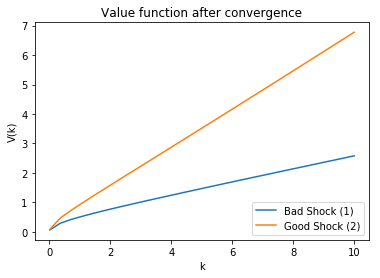

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Converged after iteration 51


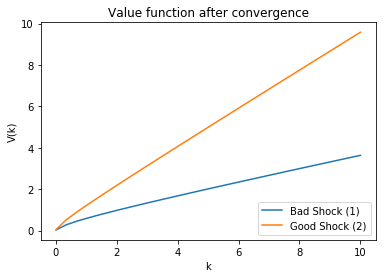

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Converged after iteration 27


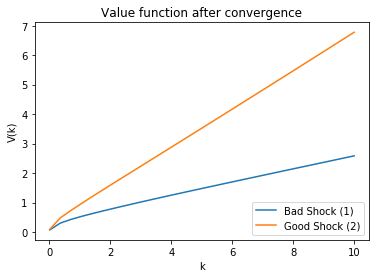

<function interpolate.<locals>.<lambda> at 0x131aef5598>
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Converged after iteration 25


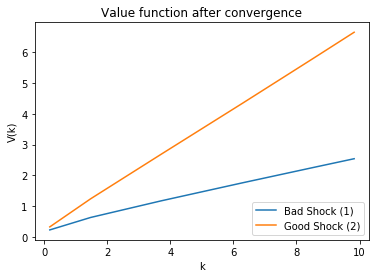

In [47]:
def util(c):
    print(c)
    if (c > 0):
        return np.log(c)
    else:
        return -9999999
    
d_util = lambda c: 1.0/c 

f_1 = lambda k: .9*(k**.3) + .3*k
f_2 = lambda k: 1.1*(k**.3) + .9*k
df_1 = lambda k: .27*(k**-.7) + .3
df_2 = lambda k: .33*(k**-.7) + .9

def interpolate(k_grid, policy, method="pw-linear"):
    if (method == "pw-linear"):
        return interp.interp1d(k_grid, policy, kind = 'linear', fill_value = 'extrapolate')
    elif (method == "chebyshev"):
        coef = chebyshev.chebfit(k_grid, policy, 5)
        return lambda x: chebyshev.chebval(x, coef)
    elif (method == "cubic-splines"):
        return interp.interp1d(k_grid, policy, kind = 'cubic', fill_value = 'extrapolate')
    else:
        raise ValueError("Method must be one of the following list: \n - pw-linear",
                         "\n - chebyshev \n - cubic-splines")

def obj_s1(k_next, *params):
    f_1, f_2, df_1, df_2, du, k, inter1, inter2, beta = params
    return du(f_1(k) - k_next) - beta*( (.5 * df_1(k_next) * du(f_1(k_next) - inter1(k_next))) +
                                        (.5 * df_2(k_next) * du(f_2(k_next) - inter2(k_next))) )
    
def obj_s2(k_next, *params):
    f_1, f_2, df_1, df_2, du, k, inter1, inter2, beta = params
    return du(f_2(k) - k_next) - beta*( (.5 * df_1(k_next) * du(f_1(k_next) - inter1(k_next))) +
                                        (.5 * df_2(k_next) * du(f_2(k_next) - inter2(k_next))) )

def policy_time(beta = .9, method = "pw-linear", grid_size = 30, du = d_util):
    k_grid = np.linspace(.01, 10, grid_size)
    if method == 'chebyshev':
        k_grid_c = np.zeros(6)
        for i in range(np.size(k_grid_c)):
            k_grid_c[i] = .5 *(10.01) + .5*(9.99)*np.cos(np.pi*((2*(i+1)-1.)/(2*np.size(k_grid_c))))
        k_grid_c.sort()
        k_grid = k_grid_c
    init_policy = np.repeat(np.expand_dims(np.log(k_grid + 1),0), 2, axis=0)
    inter_1 = interpolate(k_grid, init_policy[0], method)
    print(inter_1)
    inter_2 = interpolate(k_grid, init_policy[1], method)
    eps = 10 ** - 8
    max_iterations = 1000
    diff_list = []
    
    for j in range(max_iterations):
        new_policy = np.zeros_like(init_policy)
        for i, k in enumerate(k_grid):
            params = (f_1, f_2, df_1, df_2, du, k, inter_1, inter_2, beta)
            sol1 = optimize.root(obj_s1, inter_1(k), method = 'hybr', args=(params))
            new_policy[0][i] = sol1.x
            sol2 = optimize.root(obj_s2, inter_2(k), method = 'hybr', args=(params))
            new_policy[1][i] = sol2.x    
        inter_1 = interpolate(k_grid, new_policy[0], method)
        inter_2 = interpolate(k_grid, new_policy[1], method)
        
        
        diff = np.amax(abs(init_policy - new_policy))
        diff_list.append(diff)
        init_policy = np.copy(new_policy)
        print("Iteration: {}".format(j+1))
        if (diff < eps):
            print('Converged after iteration {}'.format(j + 1))
            plt.figure()
            plt.plot(k_grid, init_policy[0, :], label = "Bad Shock (1)")
            plt.plot(k_grid, init_policy[1, :], label = "Good Shock (2)")
            plt.legend(loc="lower right")
            plt.xlabel('k')
            plt.ylabel('V(k)')
            plt.title('Value function after convergence')
            plt.show();
            break
        
policy_time(.9, "pw-linear", 30)
d_util2 = lambda x: 4 * (x ** -3)
policy_time(.999, "pw-linear", 30, d_util2)
policy_time(.9, "cubic-splines", 30)
policy_time(.9, "chebyshev", 30)